<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/fullProvChainBiobanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# INSTALL PACKAGES
#
!pip install prov

document
  default <https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167>
  prefix cpim <http://cpim.org/>
  prefix cpm <http://part2-common-provenance-model.ISO-23494.org/>
  prefix pbm <http://part3-provenance-of-biological-material.ISO-23494.org/>
  prefix obo <http://purl.obolibrary.org/obo/>
  prefix sphn <https://biomedit.ch/rdf/sphn-ontology/sphn#>
  prefix snomed <http://snomed.info/id/>
  prefix geosparql <http://www.opengis.net/ont/geosparql#>
  prefix biobank <http://demo-biobank.org/>
  prefix hospital <http://demo-hospital.org/>
  
  bundle biobank:Biobank_bbb
    agent(biobank:WORKER_7275457, [prov:type="prov:Person", name="Anna Aligator"])
    agent(biobank:WORKER_7275987, [prov:type="prov:Person", name="Tom Turkey"])
    entity(biobank:sample_215784545, [prov:type="pbm:Sample", pbm:sampleIdentifi

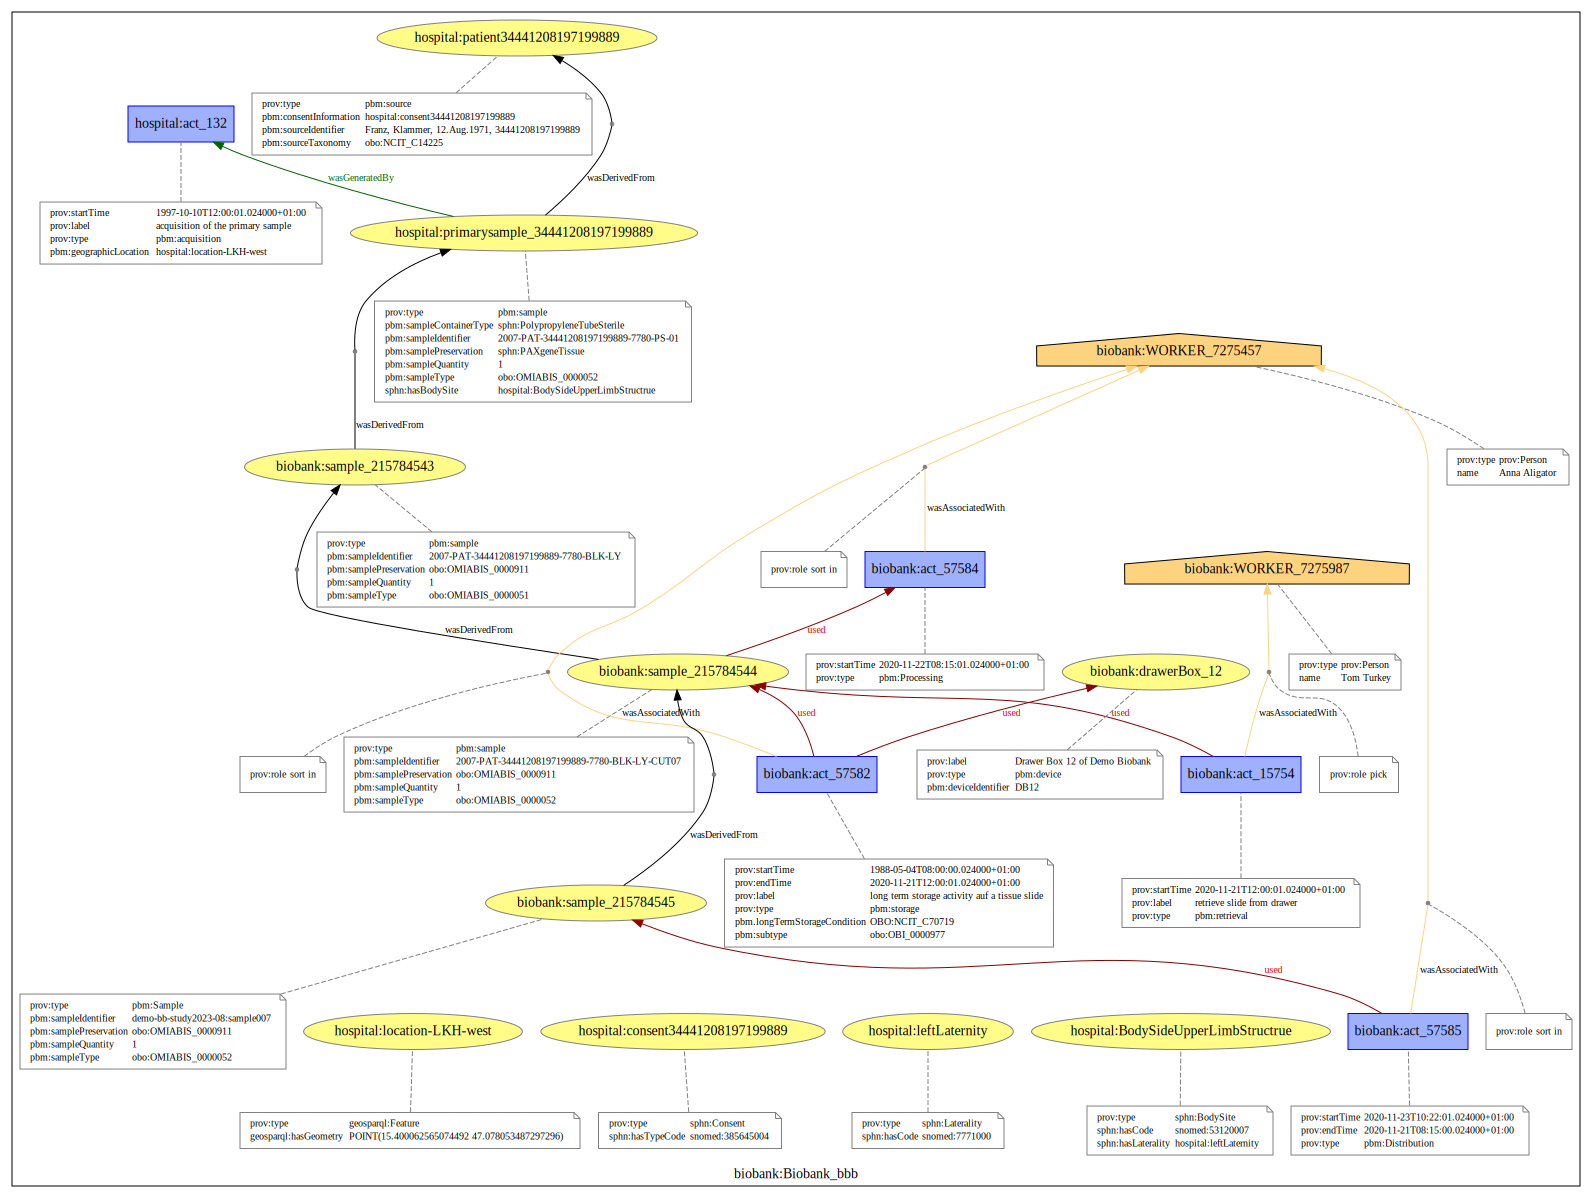

In [35]:
import prov.model as prov
import json

from prov.dot import prov_to_dot
from IPython.display import SVG

document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/Biobank')
document.add_namespace('cpim', 'http://cpim.org/')
document.add_namespace('cpm', 'http://part2-common-provenance-model.ISO-23494.org/')
document.add_namespace('pbm', 'http://part3-provenance-of-biological-material.ISO-23494.org/')
document.add_namespace('obo', 'http://purl.obolibrary.org/obo/')
document.add_namespace('sphn', 'https://biomedit.ch/rdf/sphn-ontology/sphn#')
document.add_namespace('snomed', 'http://snomed.info/id/')
document.add_namespace('geosparql', 'http://www.opengis.net/ont/geosparql#')
document.add_namespace('biobank', 'http://demo-biobank.org/')
document.add_namespace('hospital', 'http://demo-hospital.org/')

######################Biobank_delivery20201121_5784167######################
bbb = document.bundle('biobank:Biobank_bbb')
document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167')

###################### actors in the biobank ######################
bbb.agent('biobank:WORKER_7275457', {prov.PROV_TYPE: 'prov:Person', 'name': "Anna Aligator"})
bbb.agent('biobank:WORKER_7275987', {prov.PROV_TYPE: 'prov:Person', 'name': "Tom Turkey"})

################### sample, delivered to researcher ######################
sample_215784545 = bbb.entity('biobank:sample_215784545', (
    (prov.PROV_TYPE, "pbm:Sample"),
    ('pbm:sampleIdentifier', "demo-bb-study2023-08:sample007"),
    ('pbm:sampleType', "obo:OMIABIS_0000052"),
    ('pbm:samplePreservation', "obo:OMIABIS_0000911"),
    ('pbm:sampleQuantity', "1")
    ))

bbb.activity('biobank:act_57585', '2020-11-23T10:22:01.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: "pbm:Distribution"})
bbb.wasAssociatedWith('biobank:act_57585', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:act_57585', 'biobank:sample_215784545')

################### Same sample with the barcode used in the Biobank  ######################

sample_215784544 = bbb.entity('biobank:sample_215784544', (
    (prov.PROV_TYPE, "pbm:sample"),
    ('pbm:sampleIdentifier', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:sampleType', "obo:OMIABIS_0000052"),
    ('pbm:samplePreservation', "obo:OMIABIS_0000911"),
    ('pbm:sampleQuantity', "1")
    ))

bbb.wasDerivedFrom('biobank:sample_215784545' ,'biobank:sample_215784544')

#Relabeling
bbb.activity('biobank:act_57584', '2020-11-22T08:15:01.024000+01:00', None, {prov.PROV_TYPE: "pbm:Processing"})
bbb.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:sample_215784544','biobank:act_57584' )

#Retrieval from Biobank

bbb.activity('biobank:act_15754', '2020-11-21T12:00:01.024000+01:00',None,
                                { prov.PROV_TYPE: "pbm:retrieval",
                                  'prov:label':'retrieve slide from drawer'
                                }
                                )


bbb.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_7275987',None,None, {prov.PROV_ROLE: "pick"})
bbb.used('biobank:act_15754','biobank:sample_215784544',)

#Storing in Biobank


drawerBox_12 = bbb.entity('biobank:drawerBox_12', (
      (prov.PROV_TYPE, "pbm:device"),
       ('prov:label','Drawer Box 12 of Demo Biobank'),
       ('pbm:deviceIdentifier', "DB12")
       ))


bbb.activity('biobank:act_57582', '1988-05-04T08:00:00.024000+01:00','2020-11-21T12:00:01.024000+01:00',
                                { prov.PROV_TYPE: "pbm:storage",
                                  'prov:label':'long term storage activity auf a tissue slide',
                                  'pbm:subtype': "obo:OBI_0000977",                 # Paraffin Storage
                                  'pbm.longTermStorageCondition': "OBO:NCIT_C70719" # Specimen at Room Temperature
                                }
                                )
bbb.wasAssociatedWith('biobank:act_57582', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:act_57582', 'biobank:sample_215784544' )
bbb.used('biobank:act_57582','biobank:drawerBox_12')




# cutting and staining to a slide


bbb.wasDerivedFrom('biobank:sample_215784544' ,'biobank:sample_215784543')


# macroscopy, making a block
sample_215784543 = bbb.entity('biobank:sample_215784543', (
    (prov.PROV_TYPE, "pbm:sample"),
    ('pbm:sampleIdentifier', "2007-PAT-34441208197199889-7780-BLK-LY"),
    ('pbm:sampleType', "obo:OMIABIS_0000051"),
    ('pbm:samplePreservation', "obo:OMIABIS_0000911"),
    ('pbm:sampleQuantity', "1")
    ))


bbb.wasDerivedFrom('biobank:sample_215784543' ,'hospital:primarysample_34441208197199889')

# can we model facts in PROV like in RDF, the following modelling is done similar
# https://sphn-semantic-framework.readthedocs.io/en/latest/user_guide/data_generation.html


bbb.entity('hospital:primarysample_34441208197199889', (
    (prov.PROV_TYPE, 'pbm:sample'),
    ('pbm:sampleIdentifier', '2007-PAT-34441208197199889-7780-PS-01'),
    ('pbm:sampleType', 'obo:OMIABIS_0000052'),
    ('pbm:samplePreservation',  'sphn:PAXgeneTissue'),
    ('pbm:sampleContainerType', 'sphn:PolypropyleneTubeSterile'),
    ('sphn:hasBodySite', 'hospital:BodySideUpperLimbStructrue'),  # an additional attribute from a specific domain
    ('pbm:sampleQuantity', '1')
    ))

bbb.entity('hospital:BodySideUpperLimbStructrue', (
    (prov.PROV_TYPE, 'sphn:BodySite'),
    ('sphn:hasCode', 'snomed:53120007'),
    ('sphn:hasLaterality', 'hospital:leftLaternity')
    ))

bbb.entity('hospital:leftLaternity', (
    (prov.PROV_TYPE, 'sphn:Laterality'),
    ('sphn:hasCode', 'snomed:7771000')
    ))


bbb.entity('hospital:patient34441208197199889', (
    (prov.PROV_TYPE, 'pbm:source'),
    ('pbm:sourceTaxonomy', 'obo:NCIT_C14225'),
    ('pbm:sourceIdentifier', 'Franz, Klammer, 12.Aug.1971, 34441208197199889'),
    ('pbm:consentInformation',  'hospital:consent34441208197199889')
    ))

bbb.entity('hospital:consent34441208197199889', (
    (prov.PROV_TYPE, 'sphn:Consent'),
    ('sphn:hasTypeCode', 'snomed:385645004') #accepted
    ))

bbb.entity('hospital:location-LKH-west', (
    ('prov:type', 'geosparql:Feature'),
    ('geosparql:hasGeometry', 'POINT(15.400062565074492 47.078053487297296)')  # Geospatial data as string literal
))

bbb.activity('hospital:act_132', '1997-10-10T12:00:01.024000+01:00',None,
                                { prov.PROV_TYPE: "pbm:acquisition",
                                  'prov:label':'acquisition of the primary sample',
                                  'pbm:geographicLocation':'hospital:location-LKH-west'
                                }
                                )
bbb.wasGeneratedBy('hospital:primarysample_34441208197199889', 'hospital:act_132')
bbb.wasDerivedFrom('hospital:primarysample_34441208197199889' ,'hospital:patient34441208197199889')

document.get_provn() # =>

provn = document.serialize(format='provn')
print(provn)

dotrep =   prov_to_dot(document)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)
